In [7]:
!pip install flashtext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
!pip install html2text 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import requests
from bs4 import BeautifulSoup
import html2text
from flashtext.keyword import KeywordProcessor
from matplotlib import pyplot as plt

In [10]:
health_class = ['calories','fitness','help','covid','vaccine','better','health','hospital','care','emergency','energy']
tech_class = ['technology','code','pay','delivery','dine-out','magic','save','voucher','deal','shop','free','off','tax','iis','api']
education_class = ['education','coaching','career','study','exams','result','admissions','ug','pg','program','university','course','certification']
sport_class = ['cricket','world cup','out','win','caption','six','four','sport','football','fifa','champion','league','betting','toss',]
keywords=health_class + tech_class + education_class + sport_class

In [11]:
#here, is a list of website 
ls_url = ['https://www.sportskeeda.com','https://www.healthifyme.com/','https://nsktu.ac.in/','https://www.etsy.com','https://magicpin.in','https://www.cricbuzz.com','https://www.iis.net/','https://www.edureka.co/','https://www.helpmecovid.com']

ls = []
for i in ls_url:
  try:
      page = requests.get(i)       
      html_code = page.content        
  except Exception as e:
      print(e)

  try:
      soup = BeautifulSoup(html_code, 'html.parser')  
      texts = soup.findAll(text=True)                 
      text_from_html = ' '.join(texts)                   
  except Exception as e:
      print(e)

  h = html2text.HTML2Text()              
  h.ignore_links = True    
  try:                 
      text = h.handle(text_from_html)            
      text_from_html=text.strip('\n').lower() 

  except Exception as e:
      print(e)

  kp0=KeywordProcessor()
  for word in keywords:
      kp0.add_keyword(word)
  kp1=KeywordProcessor()
  for word in health_class:
      kp1.add_keyword(word)
  kp2=KeywordProcessor()
  for word in tech_class:
      kp2.add_keyword(word)
  kp3=KeywordProcessor()
  for word in education_class:
      kp3.add_keyword(word)
  kp4=KeywordProcessor()
  for word in sport_class:
      kp4.add_keyword(word)

  def finalize_category(dum0,dumx):
      try:
          ans=float(dumx)/float(dum0)
          ans=ans*100
      except:
          return 0
      else:
          return ans

  def find_class():
      x=str(text_from_html)
      y0 = len(kp0.extract_keywords(x))
      y1 = len(kp1.extract_keywords(x))
      y2 = len(kp2.extract_keywords(x))
      y3 = len(kp3.extract_keywords(x))
      y4 = len(kp4.extract_keywords(x))
      Total_matches=y0   
      per1 = float(finalize_category(y0,y1))
      per2 = float(finalize_category(y0,y2))
      per3 = float(finalize_category(y0,y3))
      per4 = float(finalize_category(y0,y4))

      list = [per1,per2,per3,per4]
      maxi = max(list)
      if y0==0:
          Category='None'
      else:
          if maxi==per1:
              Category='Health'
          elif maxi==per2:
              Category='Tech'
          elif maxi==per3:
              Category='Education'
          elif maxi==per4:
              Category='Sport' 
      ls.append(Category)

  find_class()


<BarContainer object of 4 artists>

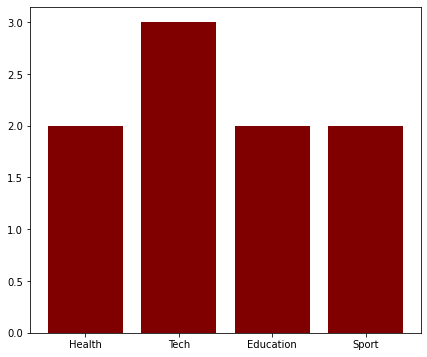

In [12]:
list1 = ['Health','Tech','Education','Sport']
from collections import Counter 
main =[]
for i in list1:
    d = Counter(ls)
    main.append(d[i])
plt.figure(figsize=(7,6))
plt.bar(list1,main,color='Maroon')


